### SPLITING DATA FOR TRAINING AND TESTING

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
df = pd.read_csv('cleaned_car_data.csv')

# Split the dataset into training and testing sets
df_train = pd.DataFrame()
df_test = pd.DataFrame()

# Get unique models and manufacturers
models = df['Model'].unique()
manufacturers = df['Manufacturer'].unique()

for model in models:
    for manufacturer in manufacturers:
        model_manufacturer_pairs = df[(df['Manufacturer'] == manufacturer) & (df['Model'] == model)]
        if(len(model_manufacturer_pairs) != 0):
            train_pairs, test_pairs = train_test_split(model_manufacturer_pairs, test_size=0.2, random_state=12)

            df_train = pd.concat([df_train, train_pairs])
            df_test = pd.concat([df_test, test_pairs])

print(df_train.shape, df_test.shape)

(9928, 391) (2647, 391)


In [2]:
df_train = df_train.drop(columns=["Manufacturer", "Model", "Fuel Type"])
df_test = df_test.drop(columns=["Manufacturer", "Model", "Fuel Type"])

print(df_train.shape, df_test.shape)

(9928, 388) (2647, 388)


In [3]:
df_train = df_train.dropna()
df_test = df_test.dropna()

### DATA SCALING

In [4]:
from sklearn.preprocessing import MinMaxScaler

non_bool_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()

scaler.fit(df_train[non_bool_columns])

df_train[non_bool_columns] = scaler.transform(df_train[non_bool_columns])
df_test[non_bool_columns] = scaler.transform(df_test[non_bool_columns])

print("Transformed df_train:")
print(df_train.head())

print("\nTransformed df_test:")
print(df_test.head())

Transformed df_train:
             Price  Transmission      Year  Motor Strength (KW)  Mileage  \
401   9.450004e-07           0.0  0.600000             0.021505    0.150   
7106  8.550004e-06           0.0  0.814286             0.055556    0.115   
321   9.000004e-07           0.0  0.628571             0.014337    0.300   
5500  7.470003e-06           0.0  0.842857             0.055556    0.182   
3643  5.850003e-06           0.0  0.800000             0.075269    0.188   

      Engine Capacity  Model_100  Model_106  Model_107  Model_116  ...  \
401          0.137931      False      False      False      False  ...   
7106         0.103448      False      False      False      False  ...   
321          0.068966      False      False      False      False  ...   
5500         0.103448      False      False      False      False  ...   
3643         0.137931      False      False      False      False  ...   

      Manufacturer_Suzuki  Manufacturer_Toyota  Manufacturer_Volkswagen  \
4

### NEURAL NETWORK

In [5]:
from keras import models
from keras import layers
from keras import optimizers

X_train = df_train.drop(columns=['Price'])  
y_train = df_train['Price']
X_test = df_test.drop(columns=['Price'])
y_test = df_test['Price']

print(X_train.shape, X_test.shape)

model = models.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='mae')

(9928, 387) (2647, 387)


c:\Users\Ema\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0174 - val_loss: 0.0147
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046 - val_loss: 0.0106
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0074
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027 - val_loss: 0.0072
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0042
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 9/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 10/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010 - val_loss: 0.0017
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


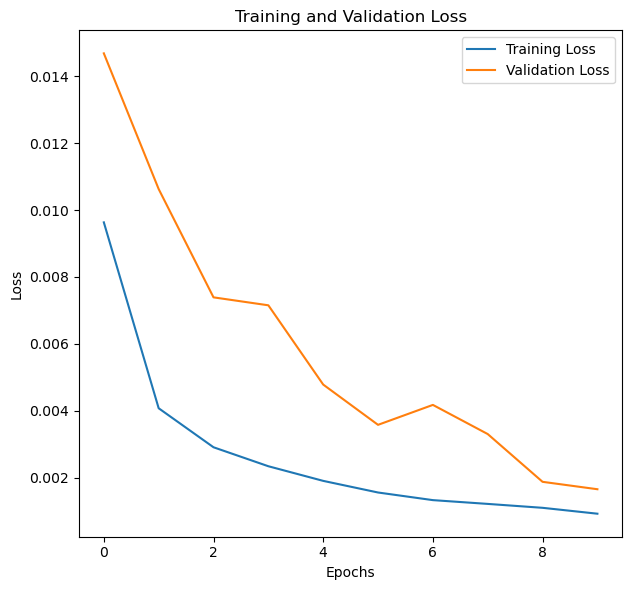

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8286e-04
Test Loss: 0.0007


In [9]:
print(df_test["Price"])

4933     7.020003e-06
274      8.100004e-07
4495     6.705003e-06
3721     6.030003e-06
3483     5.805003e-06
             ...     
12514    2.425501e-04
12536    2.749411e-04
12537    2.749411e-04
12551    3.586502e-04
12565    3.820502e-04
Name: Price, Length: 2647, dtype: float64


### LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()

history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.0011175967719460403


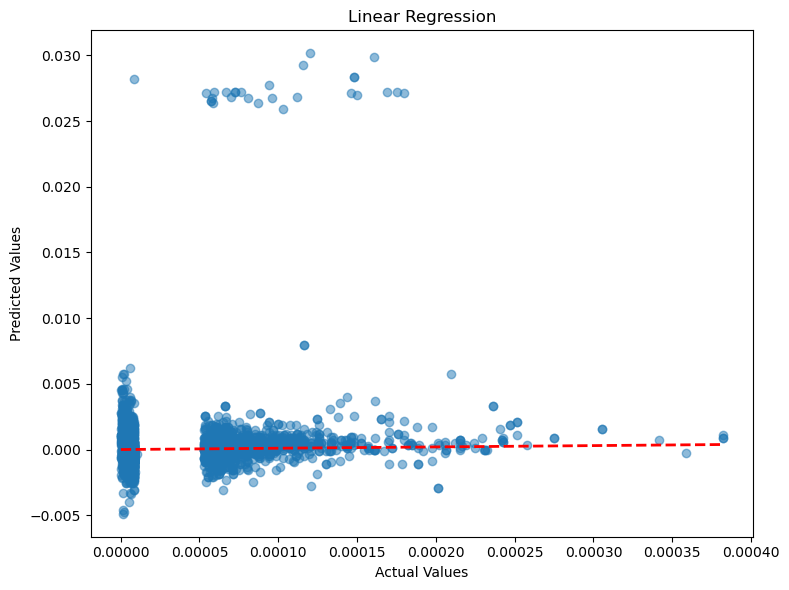

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()